# Bonus question (optional)

## 1131-301812001/302045001/351736011 

## 15 extra points to the midterm examination

### Submission deadline: 20 November 2024

### Part 1 - Generalized Binomial Option Pricing Model (**5 points**)

Following the definition on page 9 of Lecture 7, create a function for pricing the European call option.

- $ C_{t} = S_{t} \sum^{n}_{m=m^*} \pmatrix{n\\m} \tilde{q}^{m}(1 - \tilde{q})^{n-m} - \frac{K}{R^n} \sum^{n}_{m=m^*} \pmatrix{n\\m} {q}^{m}(1 - {q})^{n-m}$

Modify the code below:

```python
import numpy as np
import pandas as pd
from scipy.stats import binom
import timeit
import matplotlib.pyplot as plt

T = 3
S = 50
K = 45
r = 0.05
v = 0.3 

def GenBinoCall(S,K,v,r,n,T):
    ... # modify here
    return Call

GenBinoCall(S, K, v, r, 1000000, T)
```
#### Expected output
Your answer should be **15.77409863471319**.

In [1]:
# Write your answer here
import numpy as np
import pandas as pd
from scipy.stats import binom
import timeit
import matplotlib.pyplot as plt

T = 3
S = 50
K = 45
r = 0.05
v = 0.3 

def GenBinoCall(S, K, v, r, n, T):
    dt = T / n  # Time step
    u = np.exp(v * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    q = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    discount = np.exp(-r * T)  # Discount factor for the entire period

    # Calculate final stock prices more efficiently using vectorization
    m = np.arange(n + 1)
    ST = S * (u**m) * (d**(n - m))  # Stock prices at maturity

    # Calculate payoff and combine with probabilities
    payoff = np.maximum(ST - K, 0)
    probabilities = binom.pmf(m, n, q)
    Call = discount * np.dot(probabilities, payoff)  # Use dot product for numerical stability

    return Call

GenBinoCall(S, K, v, r, 1000000, T)


15.774098894992527

### Part 2 - Time Complexity of CRR Model Versus Generalized Binomial Option Pricing Model (**10 points**)

The CRR Option Pricing Model for the European call option is given by:

```python
import math as m
import numpy as np

def BinoEuroCall(S,K,v,r,n,T):
    dt = T/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    q = (m.exp(r*dt)-d)/(u-d)
    Tree = np.zeros((n+1, n+1))
    
    for j in range(n+1):
        for i in range(j+1):
            Tree[i,j] = S * m.pow(d,i) * m.pow(u,j-i)
    
    Call = np.zeros((n+1, n+1))
    for j in range(n+1, 0, -1):
        for i in range(j):
            if (j == n+1):
                Call[i,j-1] = max(Tree[i,j-1]-K, 0)
            else:
                Call[i,j-1] = m.exp(-r*dt) * (q*Call[i,j] + (1-q)*Call[i+1,j]) 
                
    return Call[0, 0]
```

**BinoEuroCall** function has a time complexity of $O(n^2)$, while **GenBinoCall** function has a time complexity of $O(n)$. For details:
- https://en.wikipedia.org/wiki/Big_O_notation

When $n$ gets larger and larger, **BinoEuroCall** becomes slower and slower than **GenBinoCall**.

Modify the code below to compare the time complexities of **BinoEuroCall** and **GenBinoCall**. Hints:

- https://docs.python.org/3/library/timeit.html
- https://note.nkmk.me/en/python-timeit-measure/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html


```python
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # x-axis for tree steps (n)

for n in N:
    ... # loop over the N list to store the time complexities of CRR Call and GenBinoCall
    ... # timeit.repeat(..., repeat=100, number=1)
    
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.errorbar(...) # plot the 25% percentile, median, and 75% percentile of 100 trials for BinoEuroCall
plt.errorbar(...) # plot the 25% percentile, median, and 75% percentile of 100 trials for GenBinoCall
plt.title('Time Complexities of Binomial Option Pricing Models')
plt.ylabel('Time')
plt.xlabel('Tree steps ($n$)')
plt.legend()
plt.show()
```

#### Expected output

The computational speed depends on the hardware. Your diagram should resemble:

<img src="Complexities.png" width=800 height=400>

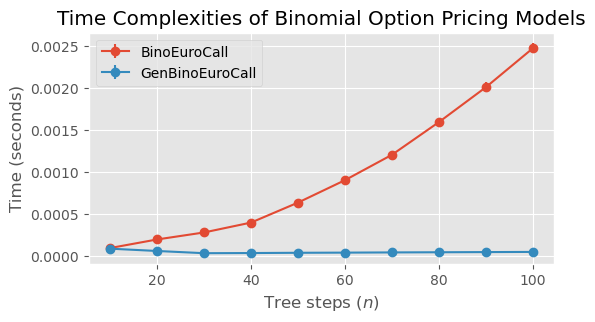

In [5]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scipy.stats import binom

def BinoEuroCall(S,K,v,r,n,T):
    dt = T/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    q = (m.exp(r*dt)-d)/(u-d)
    Tree = np.zeros((n+1, n+1))
    
    for j in range(n+1):
        for i in range(j+1):
            Tree[i,j] = S * m.pow(d,i) * m.pow(u,j-i)
    
    Call = np.zeros((n+1, n+1))
    for j in range(n+1, 0, -1):
        for i in range(j):
            if (j == n+1):
                Call[i,j-1] = max(Tree[i,j-1]-K, 0)
            else:
                Call[i,j-1] = m.exp(-r*dt) * (q*Call[i,j] + (1-q)*Call[i+1,j]) 
                
    return Call[0, 0]

def GenBinoEuroCall(S, K, v, r, n, T):
    dt = T/n
    u = m.exp(v * m.sqrt(dt))
    d = 1/u
    q = (m.exp(r*dt) - d)/(u - d)
    disc = m.exp(-r*T)
    prices = np.array([S * u**j * d**(n - j) for j in range(n+1)])
    payoff = np.maximum(prices - K, 0)
    probs = binom.pmf(range(n+1), n, q)
    C = disc * np.sum(payoff * probs)
    return C

S = 100
K = 100
v = 0.2
r = 0.05
T = 1.0

N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # x-axis for tree steps (n)

time_BinoEuroCall = []
time_GenBinoEuroCall = []

for n in N:
    stmt_Bino = "BinoEuroCall(S,K,v,r,n,T)"
    setup_Bino = "from __main__ import BinoEuroCall, S, K, v, r, n, T"
    times_Bino = timeit.repeat(stmt=stmt_Bino, setup=setup_Bino, repeat=100, number=1)
    time_BinoEuroCall.append(times_Bino)
    
    stmt_GenBino = "GenBinoEuroCall(S,K,v,r,n,T)"
    setup_GenBino = "from __main__ import GenBinoEuroCall, S, K, v, r, n, T"
    times_GenBino = timeit.repeat(stmt=stmt_GenBino, setup=setup_GenBino, repeat=100, number=1)
    time_GenBinoEuroCall.append(times_GenBino)

# Compute percentiles
medians_Bino = []
lower_Bino = []
upper_Bino = []

medians_GenBino = []
lower_GenBino = []
upper_GenBino = []

for times in time_BinoEuroCall:
    medians_Bino.append(np.percentile(times, 50))
    lower_Bino.append(np.percentile(times, 25))
    upper_Bino.append(np.percentile(times, 75))

for times in time_GenBinoEuroCall:
    medians_GenBino.append(np.percentile(times, 50))
    lower_GenBino.append(np.percentile(times, 25))
    upper_GenBino.append(np.percentile(times, 75))

# Compute error bars
lower_errors_Bino = np.array(medians_Bino) - np.array(lower_Bino)
upper_errors_Bino = np.array(upper_Bino) - np.array(medians_Bino)

lower_errors_GenBino = np.array(medians_GenBino) - np.array(lower_GenBino)
upper_errors_GenBino = np.array(upper_GenBino) - np.array(medians_GenBino)

plt.figure(figsize=(6,3))

plt.errorbar(N, medians_Bino, yerr=[lower_errors_Bino, upper_errors_Bino], fmt='-o', label='BinoEuroCall')
plt.errorbar(N, medians_GenBino, yerr=[lower_errors_GenBino, upper_errors_GenBino], fmt='-o', label='GenBinoEuroCall')

plt.title('Time Complexities of Binomial Option Pricing Models')
plt.ylabel('Time (seconds)')
plt.xlabel('Tree steps ($n$)')
plt.legend()
plt.show()
